In [2]:
#importing librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
#data read
dataset = pd.read_excel('8.Kmedoid.xlsx')
print(dataset)
#datapoint gulo ekta list a convert korsi ei part tuku te
x_values = dataset['x'].tolist()
y_values = dataset['y'].tolist()
X = [[x, y] for x, y in zip(x_values, y_values)]
print('X=' ,X)

    x   y
0   9   3
1  15   6
2  15  12
3  21  12
4  24  16
5  30  20
6  35  24
X= [[9, 3], [15, 6], [15, 12], [21, 12], [24, 16], [30, 20], [35, 24]]


Iteration 1 Cost: 75.36443804414289
Iteration 2 Cost: 75.36443804414289

Medoids:
[[21 12]
 [15  6]]

Cluster Assignments:
[2 2 1 1 1 1 1]

Cluster 1 Data Points:
    x   y
2  15  12
3  21  12
4  24  16
5  30  20
6  35  24

Cluster 2 Data Points:
    x  y
0   9  3
1  15  6


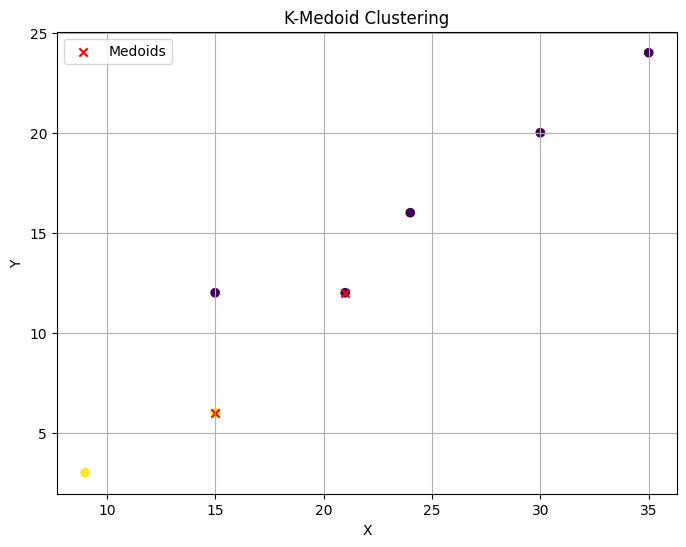

In [8]:
#main part of k-medoid algorithm
def k_medoid(dataset, k, distance_metric='euclidean', max_iterations=100):
    # Step 1: Select K random data points as medoids
    medoids = dataset.sample(n=k).values  
    for iteration in range(max_iterations):
        # Step 2: Calculate the distance of each data point from the medoids
        distances = cdist(dataset.values, medoids, metric=distance_metric)        
        # Step 3: Assign data points to clusters based on the closest medoid
        clusters = np.argmin(distances, axis=1) + 1  # Shift cluster names by 1
        # Step 4: Calculate the cost (sum of distances) for each cluster
        costs = np.zeros(k)
        for i in range(k):
            cluster_points = dataset.iloc[np.where(clusters == i + 1)]  # Shift cluster index by 1
            medoid_distance = cdist(cluster_points.values, [medoids[i]], metric=distance_metric)
            costs[i] = np.sum(medoid_distance) 
        # Print cost in each iteration
        print("Iteration", iteration+1, "Cost:", np.sum(costs))    
        # Step 5: Select a random data point to swap with a medoid
        random_index = np.random.randint(0, dataset.shape[0])
        random_point = dataset.iloc[random_index].values   
        for i in range(k):
            # Step 6: Swap and calculate the cost with the temporary medoid
            temp_medoids = medoids.copy()
            temp_medoids[i] = random_point       
            temp_distances = cdist(dataset.values, temp_medoids, metric=distance_metric)
            temp_clusters = np.argmin(temp_distances, axis=1) + 1  # Shift cluster names by 1           
            temp_costs = np.zeros(k)
            for j in range(k):
                cluster_points = dataset.iloc[np.where(temp_clusters == j + 1)]  # Shift cluster index by 1
                medoid_distance = cdist(cluster_points.values, [temp_medoids[j]], metric=distance_metric)
                temp_costs[j] = np.sum(medoid_distance)            
            # Step 6: Check if the swap improves the cost
            if np.sum(temp_costs) < np.sum(costs):
                medoids = temp_medoids
                clusters = temp_clusters
                costs = temp_costs
                break       
        # Step 7: Check for convergence
        if np.array_equal(clusters, temp_clusters):
            break    
    return medoids, clusters
dataset = pd.read_excel('8.Kmedoid.xlsx')
# Specify the number of clusters (k)
k = 2
# Apply k-medoid algorithm
medoids, clusters = k_medoid(dataset, k)
# Print the resulting medoids and cluster assignments
print("\nMedoids:")
print(medoids)
print("\nCluster Assignments:")
print(clusters)
# Print all data points within each cluster
for i in range(k):
    cluster_points = dataset.iloc[np.where(clusters == i + 1)]  # Shift cluster index by 1
    print(f"\nCluster {i + 1} Data Points:")
    print(cluster_points)
# Scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=clusters)
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x', label='Medoids')
plt.title('K-Medoid Clustering')
#plt.xlim(min(x) - 10, max(x) + 10)
#plt.ylim(min(y) - 10, max(y) + 10)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()